## Tools
In this project, we will make use of: 
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data
- Pandas, a powerful library for data manipulation and analysis, offering data structures such as DataFrames and Series for handling structured data efficiently.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Simple Linear Regression on Housing Data

Using the **Boston Housing** dataset from Kaggle

For simplicity, I’m using only one feature — **RM** *(average number of rooms per dwelling)* — and one target — **MEDV** *(median home value)* — to make the concept easy to understand and visualize.


In [5]:

data = pd.read_csv("housing.csv",delim_whitespace=True, header=None)
data.columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

x=data["RM"]
y=data["MEDV"]
m=len(y)

### Initializing Parameters and Training Setup

- Weights (`w`) and bias (`b`) are initialized to zero. These are the parameters the model will learn during training.

- Learning rate (`α`) controls how big a step we take in each update.  
  - Too high → model may overshoot and fail to converge.  
  - Too low → model converges very slowly.

- Epochs represent how many times the model sees the entire dataset during training.  
  - More epochs can improve learning, but too many can cause overfitting.

- We also keep a list called `costs` to track the cost function’s value after each epoch for later analysis and visualization.


In [12]:
w = 0
b = 0
alpha = 0.01  
epochs = 3000
costs = []


# Implementing Gradient Descent

In this step, we use the mathematical formulas for the cost function and gradients to update our model parameters \( w \) and \( b \).

---

## 1. Cost Function (Mean Squared Error)

$$
J(w,b) = \frac{1}{2m} \sum\limits_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2
$$

Where:
- \( m \) = number of samples  
- $\hat{y} = w \cdot x + b$ → predicted value
- \( y \) = actual value  

This measures how far our predictions are from the real values.

---

## 2. Gradients

The gradients tell us how much to change \( w \) and \( b \) to reduce the cost:

$$
\begin{align}
\frac{\partial J(w,b)}{\partial w} &= \frac{1}{m} \sum\limits_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right) x^{(i)} \\
\frac{\partial J(w,b)}{\partial b} &= \frac{1}{m} \sum\limits_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)
\end{align}
$$

---

## 3. Parameter Updates

We update \( w \) and \( b \) by moving in the opposite direction of the gradients (**gradient descent**):

$$
\begin{align}
w &:= w - \alpha \frac{\partial J(w,b)}{\partial w} \\
b &:= b - \alpha \frac{\partial J(w,b)}{\partial b}
\end{align}
$$

Where:
- $\alpha$ = learning rate

---

## Relation to Code

```python
y_pred = w*x + b          # computes y_hat
error = y_pred - y        # computes (y_hat - y)
cost = (1/(2*m)) * np.sum(error ** 2)  # cost function

# Gradients
dW = (1/m) * np.sum(error * X)
db = (1/m) * np.sum(error)

# Parameter updates
w -= α * dW
b -= α * db



In [13]:

for i in range(epochs):
    y_pred = w*x+b
    error = y_pred -y
    cost= (1/(2*m)) * np.sum(error ** 2)
    costs.append(cost)
    # Gradients
    dW = (1/m) * np.sum(error * x)
    db = (1/m) * np.sum(error)
    w -= alpha * dW  
    b -= alpha * db

print(f"Model training complete.\nFinal parameters after {epochs} epochs:\n  w = {w:.4f}\n  b = {b:.4f}")


Model training complete.
Final parameters after 3000 epochs:
  w = 5.2409
  b = -10.1088


## Cost Function During Training

The plot shows the cost (Mean Squared Error) over iterations.  
A steadily decreasing curve indicates that gradient descent is converging and the model is learning effectively.


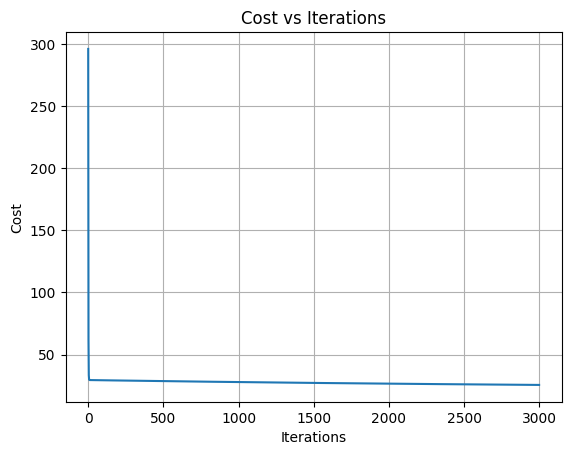

In [14]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.grid(True)
plt.show()


## Model Fit Visualization

This plot compares the original data points with the fitted regression line from our trained model:

- **Blue points** represent the actual data — in this case, each point shows the relationship between the average number of rooms (RM) and the corresponding house price (MEDV).
- **Red line** represents the regression line learned by the model — this is the model's best estimate of the relationship between RM and MEDV, based on the training data.

By visually comparing the red line to the blue points:
- If the line closely follows the trend of the points, the model has captured the underlying relationship well.
- Large deviations between the points and the line may indicate that the model is underfitting or that there is noise in the data.

This visualization provides an intuitive check of the model's performance before relying on numerical metrics alone.


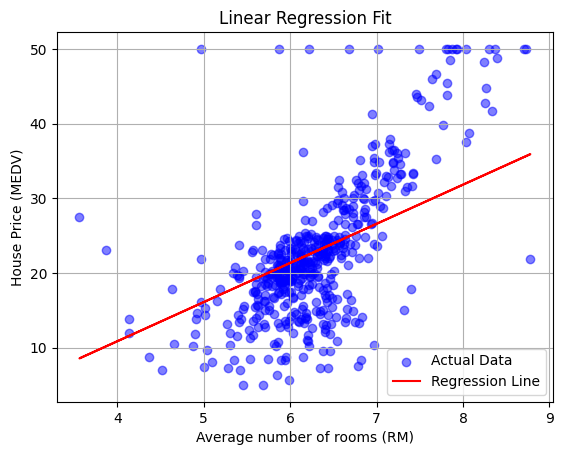

In [15]:
plt.scatter(x, y, color='blue', label='Actual Data', alpha=0.5)
plt.plot(x, w*x + b, color='red', label='Regression Line')
plt.xlabel('Average number of rooms (RM)')
plt.ylabel('House Price (MEDV)')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()

## Using Scikit-learn for Comparison

After training our own linear regression model from scratch, we now use Scikit-learn’s `LinearRegression` to train on the same data.  
This allows us to compare the learned parameters and check if our manual implementation produces similar results to a well-tested library.


In [16]:
from sklearn.linear_model import LinearRegression

# Reshape x for scikit-learn (needs 2D array)
x_reshaped = x.values.reshape(-1, 1)


# Create and train model
model = LinearRegression()
model.fit(x_reshaped, y)

# Get scikit-learn's learned parameters
w_sklearn = model.coef_[0]
b_sklearn = model.intercept_

print(f"Sklearn w: {w_sklearn:.4f}, Sklearn b: {b_sklearn:.4f}")

Sklearn w: 9.1021, Sklearn b: -34.6706


## Manual vs Scikit-learn Linear Regression

This plot compares the regression line from our **manual gradient descent model** with the one generated by **Scikit-learn’s** `LinearRegression`:

- **Blue points** → Actual data points (RM vs MEDV)  
- **Red line** → Manual model’s regression line  
- **Green dashed line** → Scikit-learn regression line  

In our manual implementation, the learned parameters (**W** and **b**) are updated through **gradient descent**, which is influenced by the **learning rate** and **number of epochs**:

- Increasing **epochs** allows more updates, potentially bringing W and b closer to their optimal values  
- Adjusting the **learning rate** changes the step size, affecting how quickly (or whether) the model converges  

By tuning these values, we can often make our manual model’s line more closely align with Scikit-learn’s, helping visualize how parameter choices affect model performance.


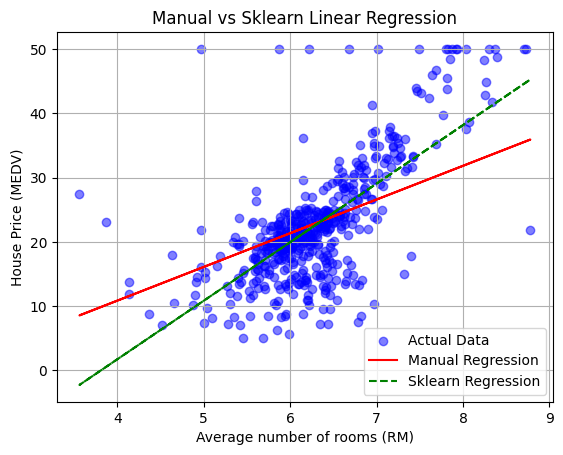

In [17]:
# Plot data
plt.scatter(x, y, color='blue', alpha=0.5, label='Actual Data')

# manual regression line
plt.plot(x, w * x + b, color='red', label='Manual Regression')

# Sklearn regression line
plt.plot(x, w_sklearn * x + b_sklearn, color='green', linestyle='--', label='Sklearn Regression')

plt.xlabel('Average number of rooms (RM)')
plt.ylabel('House Price (MEDV)')
plt.title('Manual vs Sklearn Linear Regression')
plt.legend()
plt.grid(True)
plt.show()